In [17]:
import pandas as pd
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

u'0.18.1'

In [18]:
%matplotlib inline

In [19]:
data=pd.read_csv("inoculation.csv", header=None)
data.head()

,0,1
0,5.0,5.00
1,6.0,4.50
2,7.4,4.00
3,9.0,3.57
4,10.0,3.36


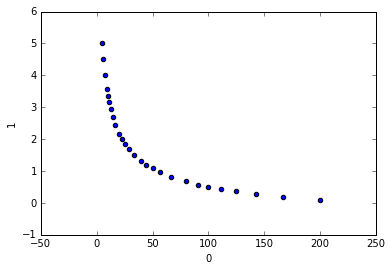

In [20]:
df = pd.DataFrame(data)
df.plot.scatter(x=0, y=1)

In [21]:
def fitfunc(p, x):
    return p[0] + p[1] * (x ** p[2])


def errfunc(p, x, y):
    return y - fitfunc(p, x)

In [22]:
def get_equation(xdata, ydata):

    qout, cov, infodict, mesg, ier = optimize.leastsq(errfunc,
                                                      [max(ydata), -1, -0.5],
                                                      args=(xdata, ydata),
                                                      maxfev=3000,
                                                      full_output=True)

    out = qout[:]
    out[0] = qout[0]
    out[1] = qout[1]
    out[2] = qout[2]

    print("{:0.6f} + {:0.6f} * x ^ {:0.6f}".format(out[0], out[1], out[2]))

    ss_err = (infodict['fvec'] ** 2).sum()
    ss_tot = ((ydata - ydata.mean()) ** 2).sum()
    rsquared = 1 - (ss_err / ss_tot)
    print(rsquared)
    return qout

In [23]:
xdata = df[0]
ydata = df[1]

qout = get_equation(xdata, ydata)

-0.999499 + 12.547938 * x ^ -0.459486
0.999990476646


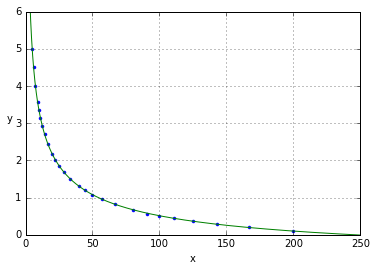

In [24]:
xp = np.linspace(0, 250, num=1500)
pxp = fitfunc(qout, xp)

plt.plot(xdata, ydata, '.', xp, pxp, '-')
plt.xlim(0, 250)
plt.ylim(0, 6)
plt.xlabel('x')
plt.ylabel('y', rotation='horizontal')
plt.grid(True)
plt.show()